In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

This notebook is an example on how to animate a plot. An easy to use command is also provided to make sure the animation is displayed inline in the notebook. 

# Method 1: using integer frames and letting update function do the heavy-lifting

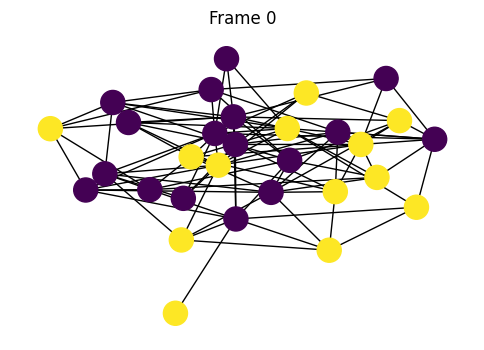

In [11]:
from matplotlib import animation



def simple_update(num, n, layout, G, ax):
    ax.clear()

    # Draw the graph with random node colors
    random_colors = np.random.randint(2, size=n)
    nx.draw(G, pos=layout, node_color=random_colors, ax=ax)

    # Set the title
    ax.set_title("Frame {}".format(num))


def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    n = 30 # Number of nodes
    m = 100 # Number of edges
    G = nx.gnm_random_graph(n, m)
    layout = nx.spring_layout(G)

    ani = animation.FuncAnimation(fig, simple_update, frames=10, fargs=(n, layout, G, ax))
    ani.save('animation_1.gif', writer='pillow')

    return ani

ani1=simple_animation()

For saving:

In [5]:
ani1.save('animation_1.gif', writer='pillow')

# Method 2: Simple update but the information is contained in the Frame


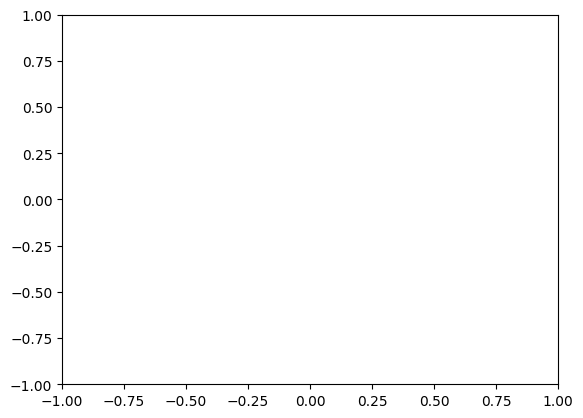

In [12]:
def animate(U,xs,xleft=-1,xright=1,ybottom=-1,ytop=1):
    fig, ax = plt.subplots()
    xdata, ydata = [], []
    ln, = plt.plot([], [],linewidth=0.5)

    def init():
        ax.set_xlim(xleft, xright)
        ax.set_ylim(ybottom, ytop)
        return ln,

    def update(u):
        ln.set_data(xs, u)
        return ln,

    ani = animation.FuncAnimation(fig, update, frames=U,
                        init_func=init, blit=True)
    return ani

xs=np.linspace(-1,1,100)
U=np.stack([np.sin(np.pi*(xs+t)) for t in np.linspace(0,10,100)])
ani2=animate(U,xs,xleft=-1,xright=1,ybottom=-1,ytop=1)

# Using HTML to print animation inline

In [10]:
from IPython.display import HTML

HTML(ani1.to_jshtml())

In [13]:
HTML(ani2.to_jshtml())